In [117]:
import numpy as np
import pandas as pd
import os
from math import ceil, isnan
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, PoissonRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 9,7
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [124]:
# path = 'D:\\Amro\\courses\\Data-Scientist-NanoDegree\\Project-1'
# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## Data Gathering

In [155]:
df_2020 = pd.read_csv('2020/survey_results_public.csv')
df_2019 = pd.read_csv('2019/survey_results_public.csv')
df_2018 = pd.read_csv('2018/survey_results_public.csv')
df_2017 = pd.read_csv('2017/survey_results_public.csv')
df_2016 = pd.read_csv('2016/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')

INFO:pycodestyle:5:80: E501 line too long (105 > 79 characters)


In [133]:
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [132]:
df_2020.shape

(64461, 61)

In [131]:
# Columns with average null value greater than 40%
df_2020.columns[df_2020.isnull().mean() > 0.4]

Index(['CompTotal', 'ConvertedComp', 'NEWPurchaseResearch'], dtype='object')

In [134]:
df_2020.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [116]:
df_2020.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


### Display 2020 Developer Type distribution

In [135]:
df_2020['DevType']

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64461, dtype: object

In [142]:
# Create dataframe containing instances of non-null Developer types
DevType = []
for i in range(len(df_2020)):
    try:
        temp = df_2020['DevType'][i].split(';')
        for val in temp:
            DevType.append(val)
    finally:
        continue

DevType = pd.DataFrame(DevType, columns=['dev'])

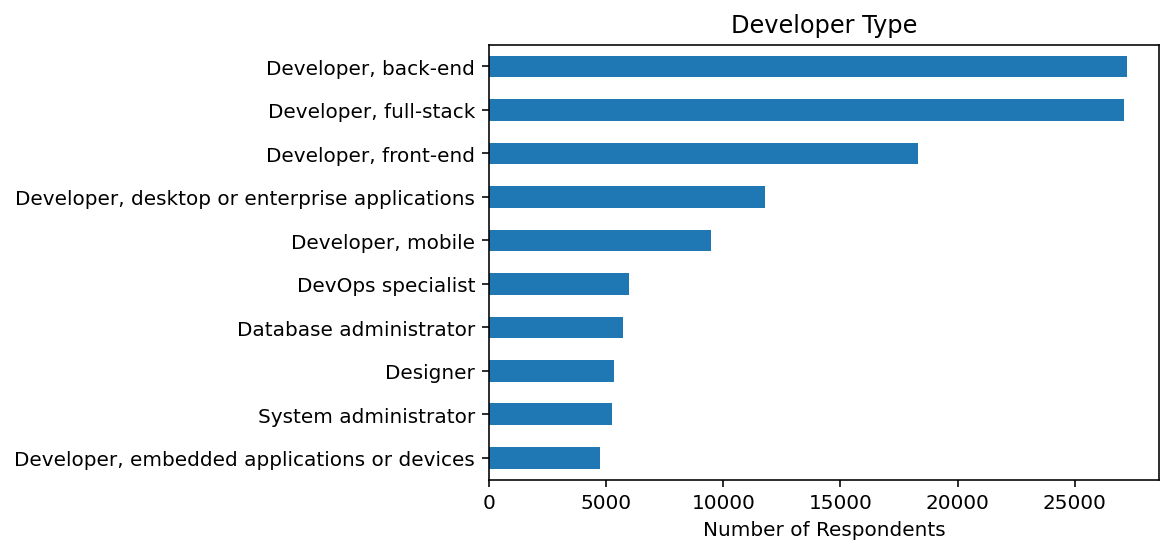

In [141]:
# Plot Developer type Distribution
DevType.dev.value_counts()[:10].plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Number of Respondents')
plt.title('Developer Type')
plt.show()

In [240]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [219]:
df_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [28]:
# df_2019.CurrencySymbol.value_counts()

In [16]:
df_2019.shape

(88883, 85)

In [353]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [17]:
df_2018.shape

(98855, 129)

In [27]:
# df_2018.columns.to_list()

In [17]:
sat_18 = df_2018.JobSatisfaction.value_counts()

In [143]:
df_2017.ConvertedComp.mean()

56298.480640629256

In [18]:
df_2017.shape

(51392, 154)

In [26]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# sorted(df_2017.columns.to_list())

In [189]:
df_2017 = df_2017.rename(columns={'HaveWorkedLanguage':'LanguageWorkedWith'})

In [25]:
# df_2017.JobSatisfaction.value_counts()

In [19]:
sat_17 = df_2017.JobSatisfaction.value_counts()

In [539]:
df_2016.head()

,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,"Mobile Dev (Android, iOS, WP & Multi-Platform)",...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df_2016.shape

(56030, 65)

In [23]:
# sorted(list(df_2016.columns))

In [24]:
# df_2016.Country

In [1]:
# df_2016['job_satisfaction'].value_counts().plot.pie(y='mass', figsize=(7, 7))

In [21]:
sat_16 = df_2016.job_satisfaction.value_counts()

### Top 10 languages used by developers over the years

In [278]:
def top_languages(df, col='LanguageWorkedWith' ,title = 'Top 10 languages worked with'):
    '''
    INPUT:
    df - pandas dataframe containing language column
    col - column name
    title - plot title
    
    OUTPUT:
    df - a new dataframe that contains the top ten languages with their respective percentages
    '''
    df_lang = []
    count = 0
    possible_vals = ["Bash/Shell/PowerShell", "C", 
                 "C#", "C++", "Dart",
                 "Go", "Haskell", "HTML/CSS",
                 "Java", "JavaScript",
                 "Julia", "Kotlin", "Objective-C",
                 "Perl", "PHP", "Python", "R",
                 "Ruby", "Rust", "Scala", "SQL", 
                 "Swift", "TypeScript", "VBA", "F#",
                 "Erlang", "Elixir", "Clojure", "Assembly",
                "WebAssembly", "CoffeeScript", "Groovy", "Hack",
                "Matlab", 'C++11', 'Lua' ]
    
    # get all possible non-null values in col
    for i in range (len(df)):
        try:
            x = df[col][i].split(';')
            count += 1
            for lang in x:
                lng = lang.replace(" ", "")
                df_lang.append(lng)
        finally:
            continue

    
    df_lang = pd.DataFrame(df_lang, columns=[col])
    data_lang = df_lang[col].value_counts().reset_index()
    data_lang.rename(columns={'index': 'Language'}, inplace=True)
    
    # remove any entry in data_lang that is not in possible_vals
    for i in range(len(data_lang)):
        if data_lang['Language'][i] not in possible_vals:
            data_lang = data_lang[data_lang['Language'] != data_lang['Language'][i]]
    
    #get top ten languages and their respective percentages
    data_lang.set_index('Language', inplace=True)
    data_lang_10 = ((data_lang)[:10]/count) * 100
    
    #plot languages
    data_lang_10.plot(kind='barh', legend=None, subplots=True );
    plt.gca().invert_yaxis()
    plt.title(title);
    plt.ylabel('Language')
    plt.xlabel('Percentage of developers')
    plt.show()
    
    return data_lang[:10]/count

In [112]:
# props_df_2020 = clean_and_plot(df_2020)
df_2017 = df_2017.rename(columns={'HaveWorkedLanguage':'LanguageWorkedWith'})
df_2017 = df_2017.rename(columns={'WantWorkLanguage':'LanguageDesireNextYear'})

df_2016 = df_2016.rename(columns={'tech_do':'LanguageWorkedWith'})
df_2016 = df_2016.rename(columns={'tech_want':'LanguageDesireNextYear'})

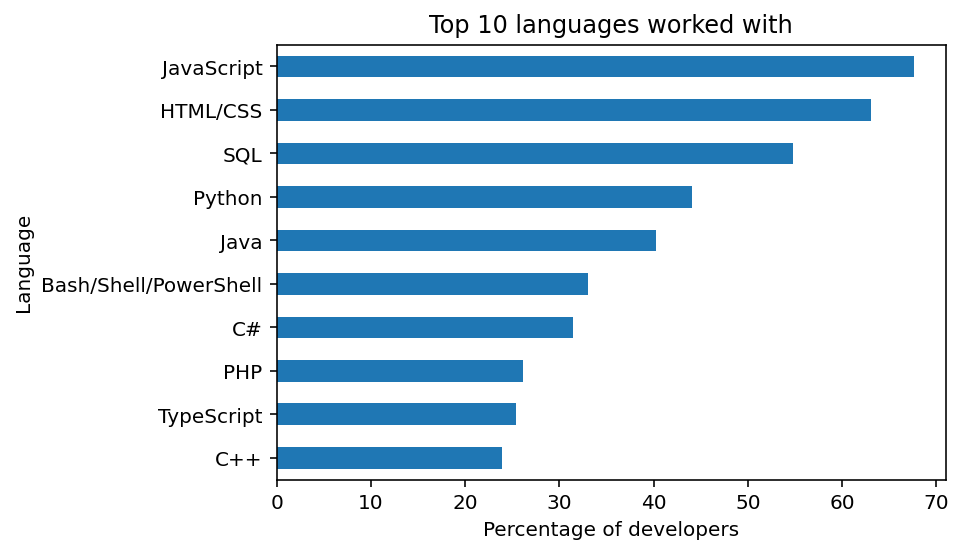

In [279]:

worked_lang_20 = top_languages(df_2020)

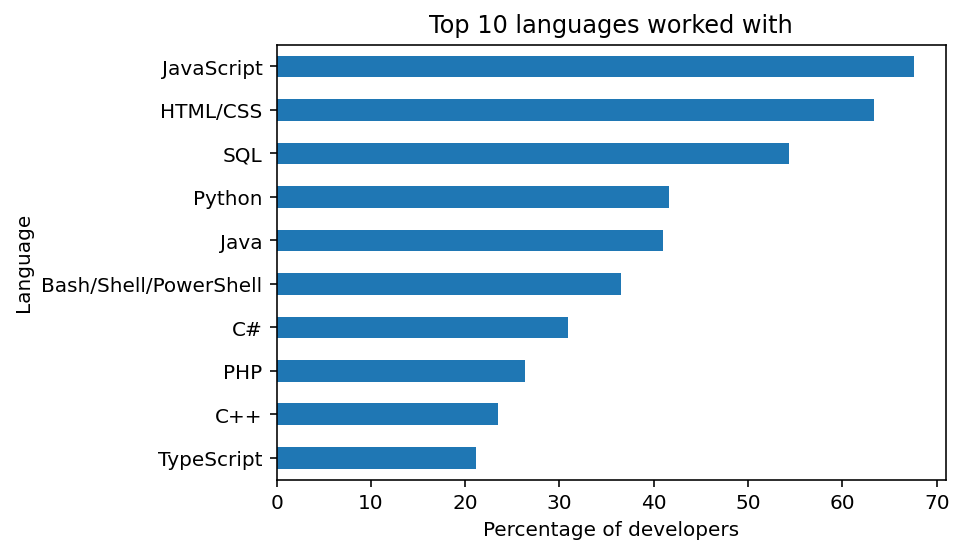

In [114]:
worked_lang_19 = top_languages(df_2019)

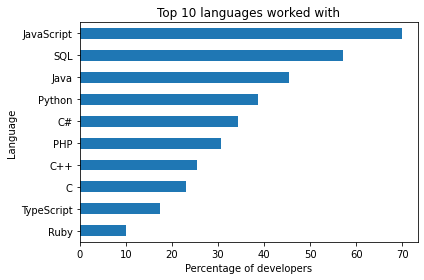

In [247]:
worked_lang_18 = top_languages(df_2018)

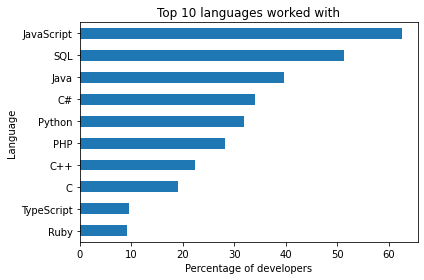

In [248]:
worked_lang_17 = top_languages(df_2017)

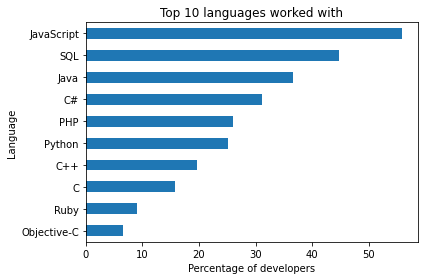

In [249]:
worked_lang_16 = top_languages(df_2016)

In [280]:
def plot_lang(df_2,df_3,df_4,df_5,df_6):
    '''
    INPUT:
    df_2 - dataframe containing top ten languages in year 2016
    df_3 - dataframe containing top ten languages in year 2017
    df_4 - dataframe containing top ten languages in year 2018
    df_5 - dataframe containing top ten languages in year 2019
    df_6 - dataframe containing top ten languages in year 2020
    
    OUTPUT:
        plot four lines representing usage/desire for four programming languages from 2016-2020
    '''
    years = ['2016','2017','2018','2019','2020']
    df_lang_imp = pd.DataFrame(columns=['JavaScript', 'Python', 'SQL', 'Java'])
    for df in df_2,df_3,df_4,df_5,df_6:
        df_lang_imp = df_lang_imp.append({'JavaScript': df.loc['JavaScript'][0] * 100,
                            'Python': df.loc['Python'][0] * 100,
                            'Java': df.loc['Java'][0] * 100,
                            'SQL':df.loc['SQL'][0] * 100}, ignore_index=True)

    ax = sns.lineplot(data = df_lang_imp, hue="event", style="event", markers=True, dashes=False)
    ax.set(title = 'Language trends for four popular programming languages')
    ax.set(xlabel='Years (2016-2020)', ylabel='Percentage of developers')

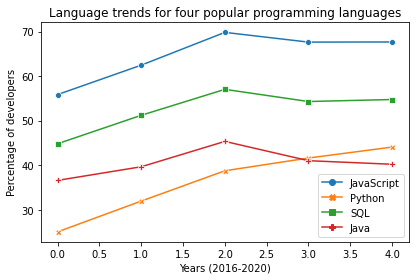

In [240]:
plot_lang( worked_lang_16, worked_lang_17, worked_lang_18, worked_lang_19, worked_lang_20)

### Top 10 languages that developers want to learn over the years

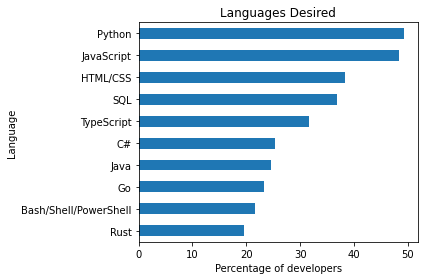

In [250]:
desired_lang_20 = top_languages(df_2020,  title='Languages Desired', col='LanguageDesireNextYear')

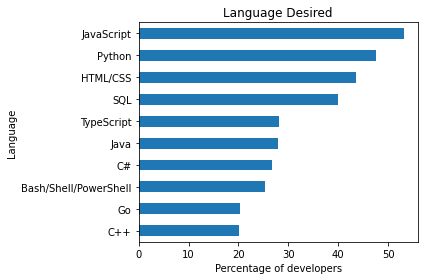

In [251]:
desired_lang_19 = top_languages(df_2019,  title='Language Desired', col='LanguageDesireNextYear')

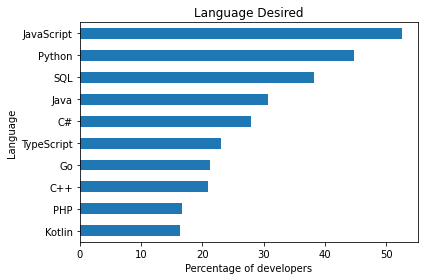

In [252]:
desired_lang_18 = top_languages(df_2018,  title='Language Desired', col='LanguageDesireNextYear')

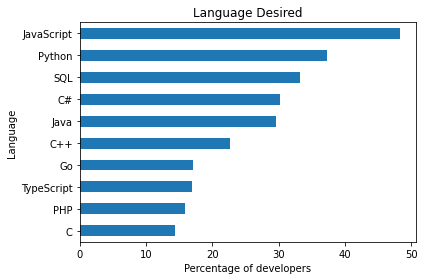

In [253]:
desired_lang_17 = top_languages(df_2017,  title='Language Desired', col='LanguageDesireNextYear')

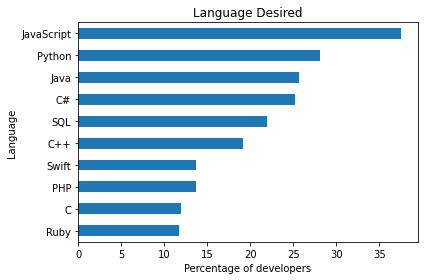

In [254]:
desired_lang_16 = top_languages(df_2016,  title='Language Desired', col='LanguageDesireNextYear')

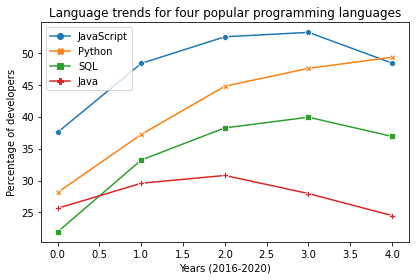

In [245]:
plot_lang(desired_lang_16, desired_lang_17, desired_lang_18, desired_lang_19, desired_lang_20)

### Median Salary over the years

In [284]:
df_2018 = df_2018.rename(columns={'ConvertedSalary':'ConvertedComp'})

In [285]:
df_2017 = df_2017.rename(columns={'Salary':'ConvertedComp'})

In [286]:
df_2016 = df_2016.rename(columns={'salary_midpoint':'ConvertedComp'})

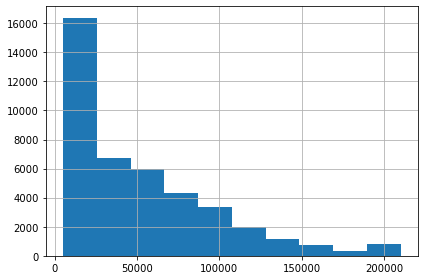

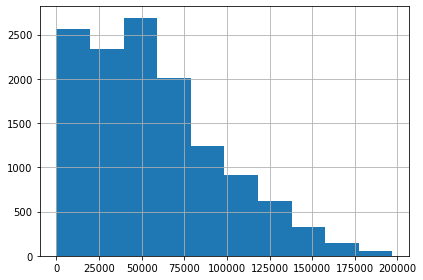

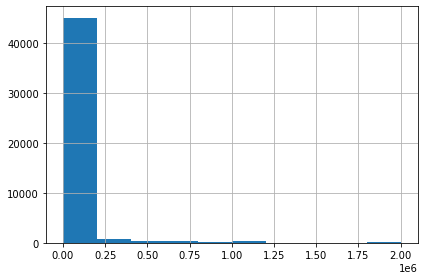

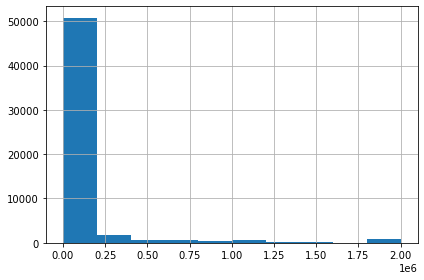

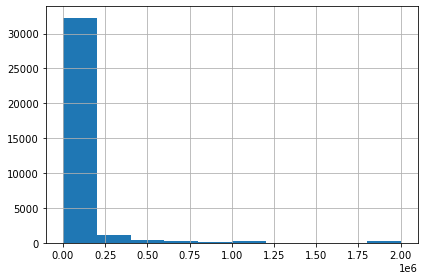

In [255]:
for df in df_2016, df_2017, df_2018, df_2019, df_2020:
    df['ConvertedComp'].hist()
    plt.show()
    

In [288]:
median_salary_yr = []

for df in df_2016, df_2017, df_2018, df_2019, df_2020:
    df_salary_no_null = df[df.ConvertedComp.isnull() == False]
    median_salary_yr.append(df_salary_no_null.ConvertedComp.median())

In [173]:
df_2016 = df_2016.rename(columns={'country':'Country'})

In [362]:
median_salary_yr_us = []
for df in df_2016, df_2017, df_2018, df_2019, df_2020:
    df_salary_no_null = df[df.ConvertedComp.isnull() == False]
    df_salary_no_null_us = df_salary_no_null[df_salary_no_null.Country == 'United States']
    median_salary_yr_us.append(df_salary_no_null_us.ConvertedComp.median())

In [363]:
median_salary_yr_us

[85000.0, 93000.0, 100000.0, 110000.0, 115000.0]

In [281]:
def plot_median_salary(median_salary_yr, title = 'Global median salary trend'):
    '''
    INPUT:
    median_salary_yr - list containing yearly values for median salary
    title - plot title
    
    OUTPUT:
        plot for median salary trend for developers from 2016-2020
    '''
    
    median_salary_yr = pd.DataFrame(median_salary_yr, columns=['Median_salary'])
    plt.plot( median_salary_yr.index,'Median_salary', data=median_salary_yr, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.xlabel('2016-2020')
    plt.ylabel('Value in USD')
    plt.title(title)
    plt.legend();

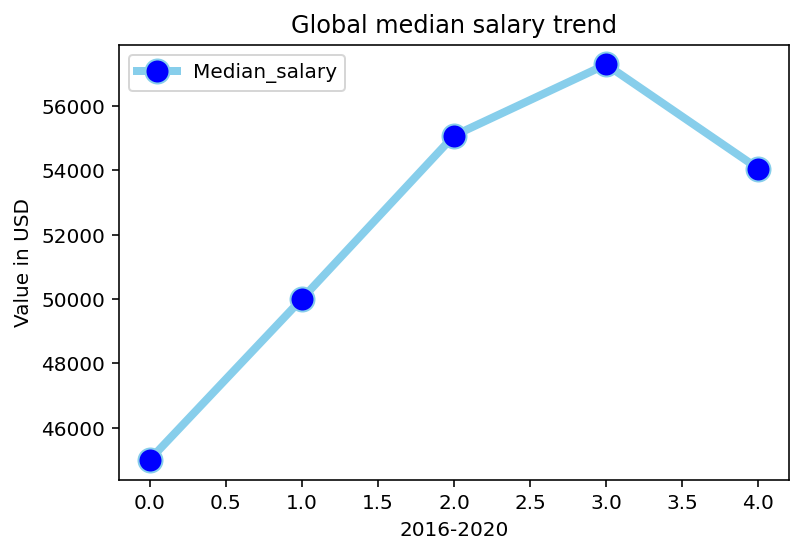

In [289]:
plot_median_salary(median_salary_yr)

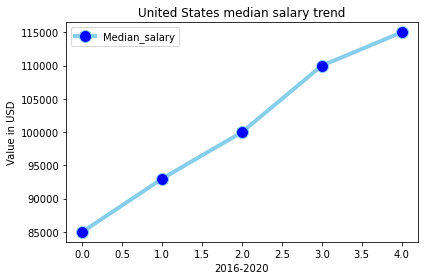

In [368]:
plot_median_salary(median_salary_yr_us, title='United States median salary trend')

## Job Satisfaction Trend 2016-2020

#### Rename Job satisfaction columns to have the same name

In [161]:
df_2018 = df_2018.rename(columns={'JobSatisfaction':'JobSat'})

In [162]:
df_2017 = df_2017.rename(columns={'JobSatisfaction':'JobSat'})

In [163]:
df_2016 = df_2016.rename(columns={'job_satisfaction':'JobSat'})

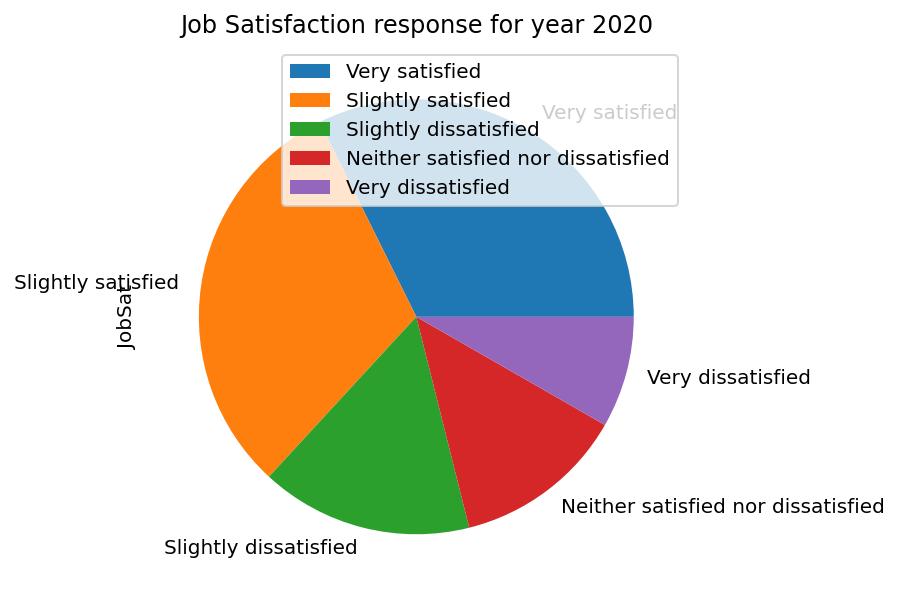

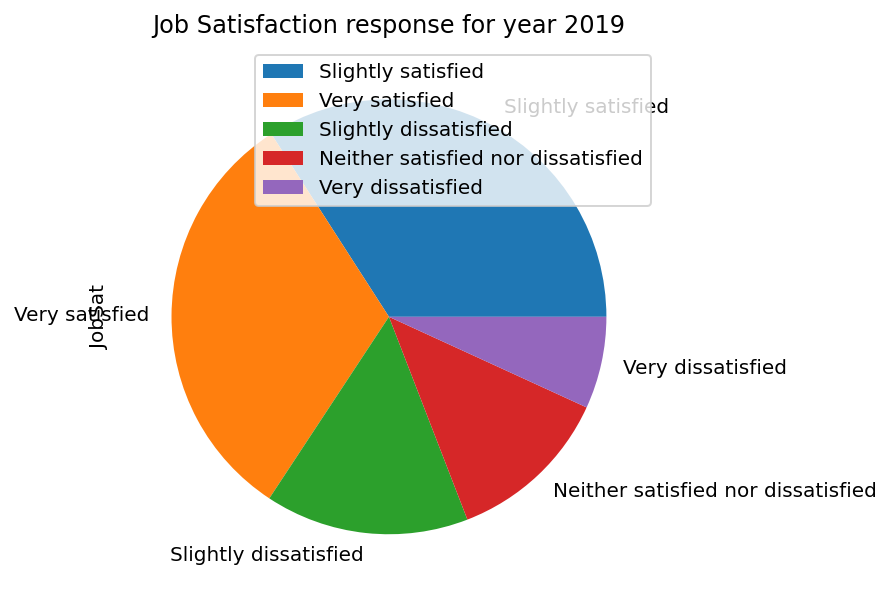

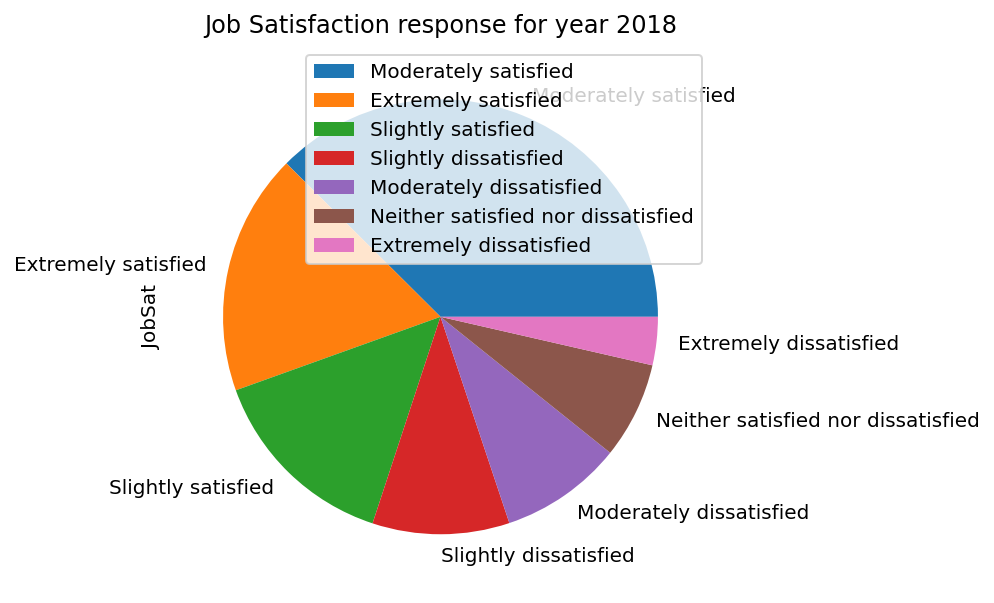

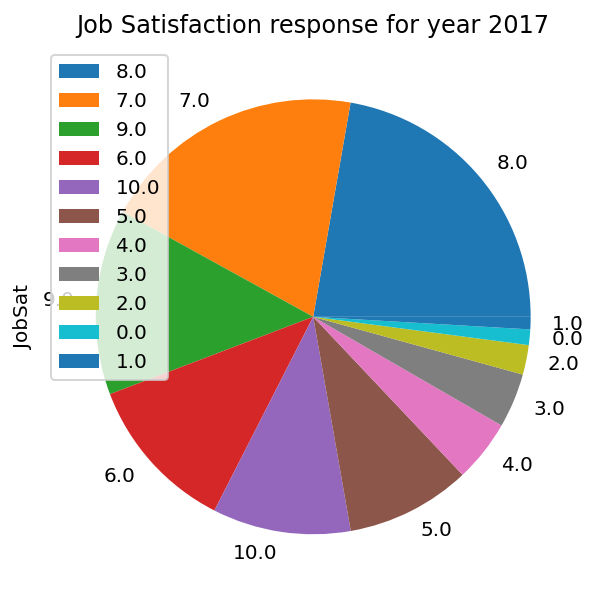

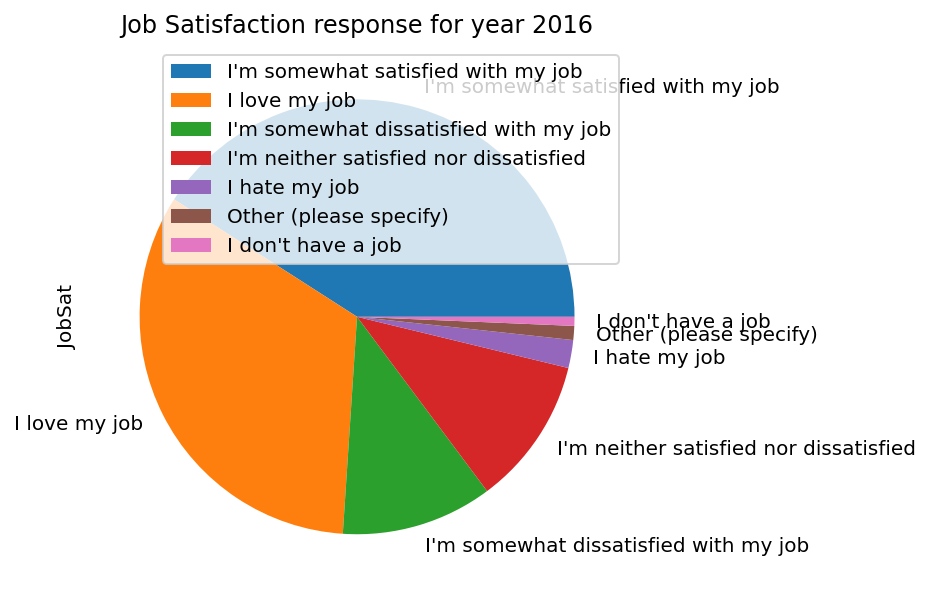

In [164]:
year = 2020
for df in df_2020, df_2019, df_2018, df_2017, df_2016:
    df.JobSat.value_counts().plot.pie(y='mass', figsize=(5, 5))
    plt.legend()
    plt.title('Job Satisfaction response for year {}'.format(year))
    year -= 1
    plt.show()

### Getting global percentages of satisfied developers for all years

In [182]:
sat_20 = df_2020.JobSat.value_counts()
sat_19 = df_2019.JobSat.value_counts()
sat_18 = df_2018.JobSat.value_counts()
sat_17 = df_2017.JobSat.value_counts()
sat_16 = df_2016.JobSat.value_counts()

sat_trend = []

sat_trend.append((sat_16['I love my job']+sat_16["I'm somewhat satisfied with my job"]) / sat_16.sum())

sat_trend.append((sat_17[10.0]+sat_17[9.0] + sat_17[8.0] + sat_17[7.0] + sat_17[6.0]) / sat_17.sum())

sat_trend.append((sat_18['Extremely satisfied']+sat_18['Moderately satisfied'] + sat_18['Slightly satisfied']) / sat_18.sum())

sat_trend.append((sat_19['Very satisfied'] + sat_19['Slightly satisfied']) / sat_19.sum())

sat_trend.append((sat_20['Very satisfied'] + sat_20['Slightly satisfied']) / sat_20.sum())

sat_trend = pd.DataFrame(sat_trend, columns=['Satisfied'])

sat_trend["Satisfied"] = sat_trend["Satisfied"] * 100

In [183]:
sat_trend.head()

,Satisfied
0,73.956619
1,77.766495
2,69.941971
3,65.728010
4,63.152188


In [187]:
def plot_sat(sat_trend, title='Global satisfaction trend'):
    '''
    INPUT:
    sat_trend - pandas dataframe with column containing yearly satisfaction percentages
    title - Plot title
    
    OUTPUT:
         displays plot of satisfaction trend
    '''
    
    plt.plot( sat_trend.index,'Satisfied',
             data=sat_trend, 
             marker='o', 
             markerfacecolor='blue',
             markersize=12, 
             color='skyblue',
             linewidth=4)
    
    plt.xlabel('2016-2020')
    plt.ylabel('Percentage of Satisfied Respondents')
    plt.title(title)
    plt.legend();

### Getting United States percentages of satisfied developers for all years

In [174]:
df_2020_sat_US = df_2020[df_2020.Country == 'United States']
df_2019_sat_US = df_2019[df_2019.Country == 'United States']
df_2018_sat_US = df_2018[df_2018.Country == 'United States']
df_2017_sat_US = df_2017[df_2017.Country == 'United States']
df_2016_sat_US = df_2016[df_2016.Country == 'United States']

In [175]:
sat_20_US = df_2020_sat_US.JobSat.value_counts()
sat_19_US = df_2019_sat_US.JobSat.value_counts()
sat_18_US = df_2018_sat_US.JobSat.value_counts()
sat_17_US = df_2017_sat_US.JobSat.value_counts()
sat_16_US = df_2016_sat_US.JobSat.value_counts()

In [176]:
sat_trend_US = []

sat_trend_US.append((sat_16_US['I love my job']+sat_16_US["I'm somewhat satisfied with my job"]) / sat_16_US.sum())

sat_trend_US.append((sat_17_US[10.0]+sat_17_US[9.0] + sat_17_US[8.0] + sat_17_US[7.0] + sat_17_US[6.0]) / sat_17_US.sum())

sat_trend_US.append((sat_18_US['Extremely satisfied']+sat_18_US['Moderately satisfied'] + sat_18_US['Slightly satisfied']) / sat_18_US.sum())

sat_trend_US.append((sat_19_US['Very satisfied'] + sat_19_US['Slightly satisfied']) / sat_19_US.sum())

sat_trend_US.append((sat_20_US['Very satisfied'] + sat_20_US['Slightly satisfied']) / sat_20_US.sum())

sat_trend_US = pd.DataFrame(sat_trend_US, columns=['Satisfied'])

sat_trend_US["Satisfied_ratio"] = sat_trend_US["Satisfied"] * 100

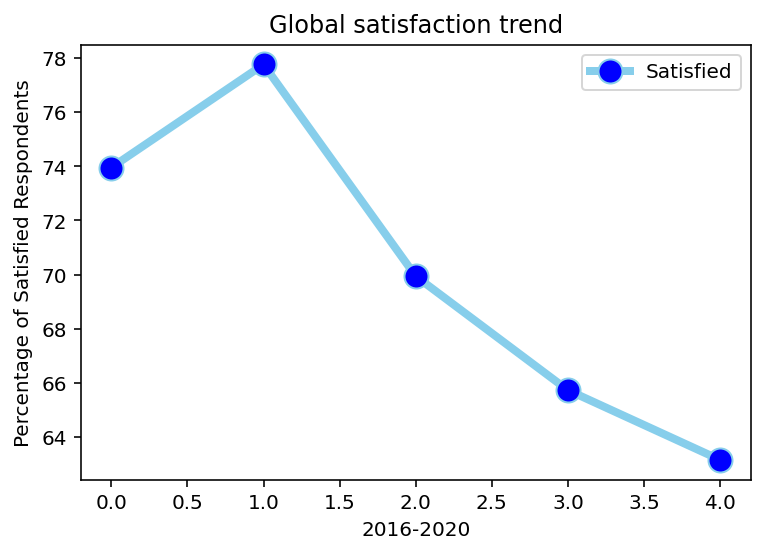

In [188]:
plot_sat(sat_trend)

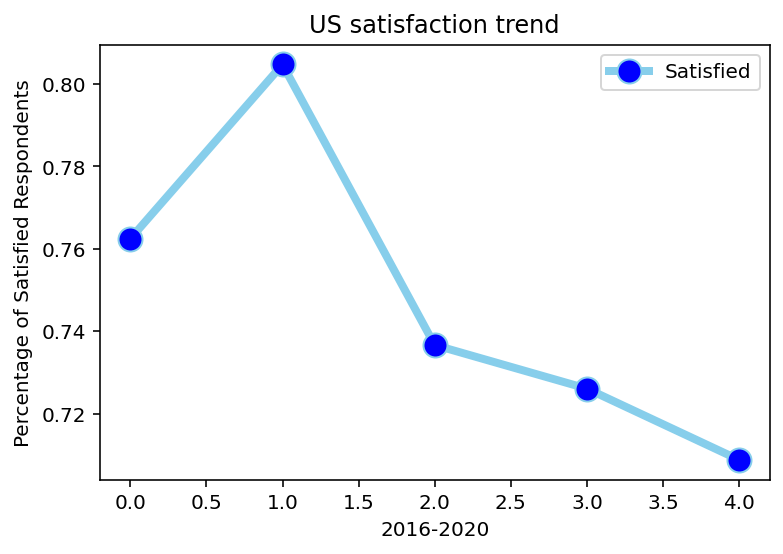

In [189]:
plot_sat(sat_trend_US, title='US satisfaction trend')

### Number of Developers By Country 2016-2020

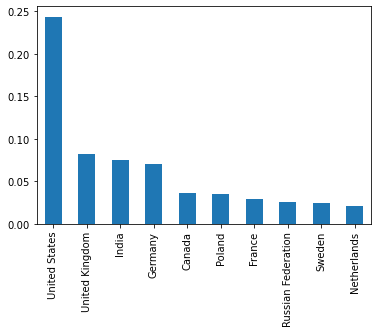

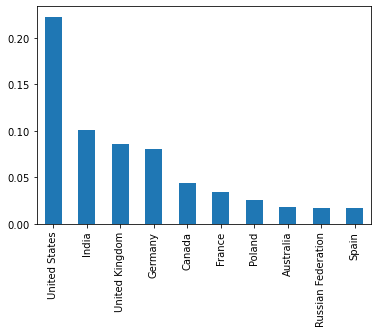

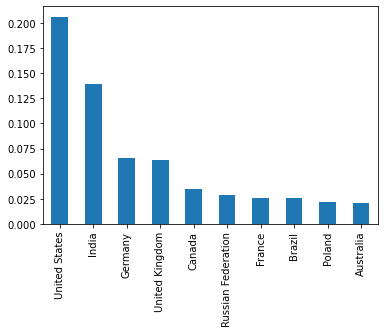

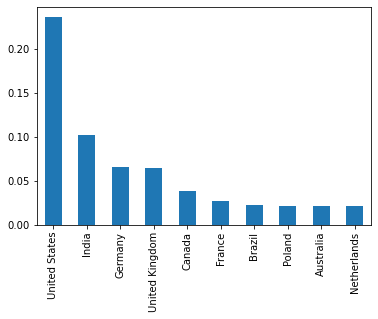

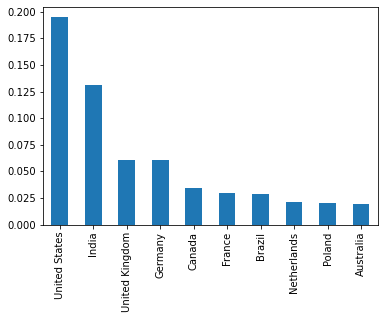

In [31]:
for df in df_2016, df_2017, df_2018, df_2019, df_2020:
    (df.Country.value_counts()[:10]/len(df[df.Country.isnull() == False])).plot.bar();
    plt.show()

## Best predictors of Salary over the years

In [193]:
# Will on be using data from 2018, 2019, 2020 as they are more consistent

# renaming some of 2018's columns for easier data manipulation

df_2018 = df_2018.rename(columns={'Hobby':'Hobbyist',
                                 'CompanySize':'OrgSize',
                                 'YearsCodingProf':'YearsCodePro',
                                 'FormalEducation':'EdLevel',
                                 'RaceEthnicity':'Ethnicity',
                                 'ConvertedSalary':'ConvertedComp'})

In [194]:
# Getting column names that exist in all three data sets
col_2020 =  df_2020.columns
col_2019 =  df_2019.columns
col_2018 =  df_2018.columns
final_cols = []
for col in a:
    if col in col_2020 and col in col_2019 and col in col_2018:
        final_cols.append(col)

In [195]:
final_cols

['Respondent',
 'Hobbyist',
 'Age',
 'ConvertedComp',
 'Country',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobSat',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'UndergradMajor',
 'YearsCodePro']

#### Creating subset dataframes and adding year column to each 

In [35]:
df_2020_final = pd.DataFrame(df_2020, columns=final_cols)

In [36]:
df_2020_final['Year'] = '2020'

In [37]:
df_2019_final = pd.DataFrame(df_2019, columns=final_cols)

In [38]:
df_2019_final['Year'] = '2019'

In [39]:
df_2018_final = pd.DataFrame(df_2018, columns=final_cols)

In [40]:
df_2018_final['Year'] = '2018'

In [41]:
df_2020_final

,Respondent,Hobbyist,Age,ConvertedComp,Country,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,...,Ethnicity,Gender,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,UndergradMajor,YearsCodePro,Year
0,1,Yes,NaN,NaN,Germany,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,White or of European descent,Man,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,"Computer science, computer engineering, or sof...",27,2020
1,2,No,NaN,NaN,United Kingdom,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,NaN,NaN,Python;Swift,JavaScript;Swift,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,"Computer science, computer engineering, or sof...",4,2020
2,3,Yes,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,2020
3,4,Yes,25.0,NaN,Albania,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,White or of European descent,Man,NaN,NaN,20 to 99 employees,NaN,NaN,"Computer science, computer engineering, or sof...",4,2020
4,5,Yes,31.0,NaN,United States,NaN,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,White or of European descent,Man,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,NaN,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,"Computer science, computer engineering, or sof...",8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,Yes,NaN,NaN,United States,NaN,NaN,NaN,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Less than 1 year,2020
64457,64867,Yes,NaN,NaN,Morocco,NaN,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,NaN,NaN,...,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,NaN,NaN,NaN,2020
64458,64898,Yes,NaN,NaN,Viet Nam,NaN,NaN,NaN,NaN,Primary/elementary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
64459,64925,Yes,NaN,NaN,Poland,NaN,DynamoDB;Elasticsearch;MongoDB;MySQL;PostgreSQL,Oracle,NaN,NaN,...,NaN,NaN,HTML/CSS;Java;JavaScript,HTML/CSS,NaN,NaN,Linux;Windows,NaN,NaN,2020


### Concatenating the data sets together

In [225]:
df_final = pd.concat([df_2020_final, df_2019_final, df_2018_final])

In [199]:
df_final.head()

,Respondent,Hobbyist,Age,ConvertedComp,Country,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,...,Ethnicity,Gender,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,UndergradMajor,YearsCodePro,Year
0,1,Yes,NaN,NaN,Germany,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,White or of European descent,Man,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,"Computer science, computer engineering, or sof...",27,2020
1,2,No,NaN,NaN,United Kingdom,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,NaN,NaN,Python;Swift,JavaScript;Swift,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,"Computer science, computer engineering, or sof...",4,2020
2,3,Yes,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,2020
3,4,Yes,25,NaN,Albania,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,White or of European descent,Man,NaN,NaN,20 to 99 employees,NaN,NaN,"Computer science, computer engineering, or sof...",4,2020
4,5,Yes,31,NaN,United States,NaN,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,White or of European descent,Man,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,NaN,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,"Computer science, computer engineering, or sof...",8,2020


In [200]:
df_final.describe()

,Respondent,ConvertedComp
count,252199.000000,1.382810e+05
mean,43904.661323,1.104330e+05
std,26697.746546,2.446523e+05
min,1.000000,0.000000e+00
25%,21219.000000,2.474400e+04
50%,42610.000000,5.513000e+04
75%,63982.000000,9.625000e+04
max,101592.000000,2.000000e+06


In [201]:
df_final.shape

(252199, 21)

In [202]:
Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [203]:
Q1, Q3

(Respondent       21219.0
 ConvertedComp    24744.0
 Name: 0.25, dtype: float64,
 Respondent       63982.0
 ConvertedComp    96250.0
 Name: 0.75, dtype: float64)

In [204]:
df_final.quantile(0.1), df_final.quantile(0.90)

(Respondent       8494.0
 ConvertedComp    8820.0
 Name: 0.1, dtype: float64,
 Respondent        82381.0
 ConvertedComp    160000.0
 Name: 0.9, dtype: float64)

### Data set contains outliers in the Salary column

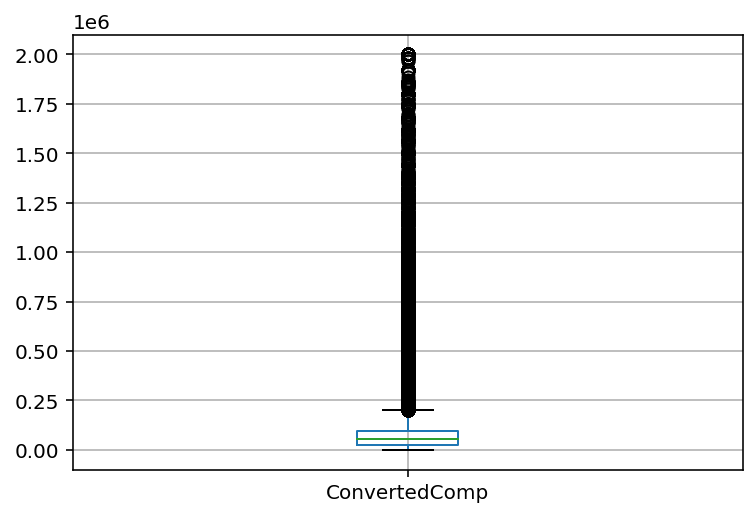

In [205]:
df_final.boxplot(column=['ConvertedComp'])

In [52]:
df_final['ConvertedComp'].mean()

110433.00741967442

### Salary distribution is right-skewed

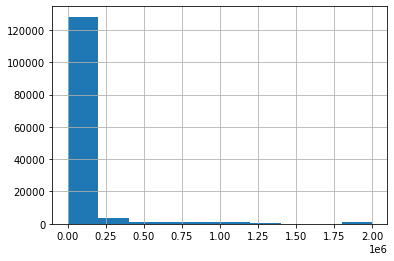

In [53]:
df_final['ConvertedComp'].hist()

#### Applying log transformation creates a normal distribution

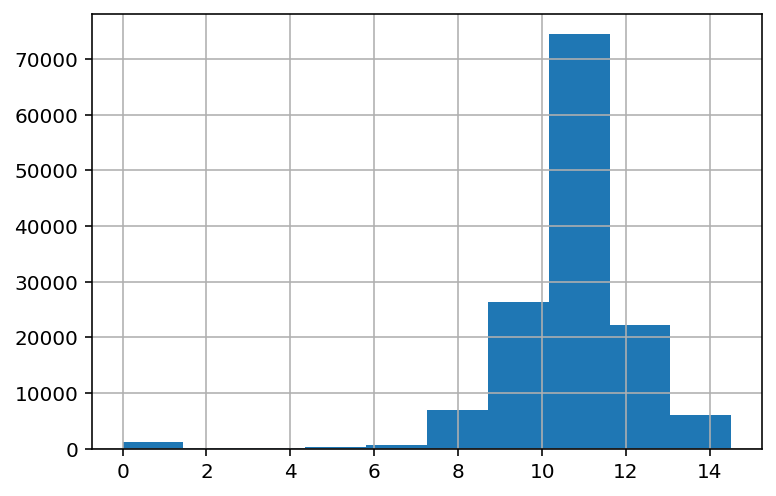

In [232]:
df_final['ConvertedComp'] =df_final['ConvertedComp'].apply(lambda x: np.log(1+x))
x.hist()

In [233]:
df_final.quantile(0.1), df_final.quantile(0.90)

(Respondent       8008.400000
 ConvertedComp       9.718001
 Name: 0.1, dtype: float64,
 Respondent       81756.200000
 ConvertedComp       11.674542
 Name: 0.9, dtype: float64)

In [234]:
q_low = df_final.ConvertedComp.quantile(0.1)
q_hi  = df_final.ConvertedComp.quantile(0.90)
df_final = df_final[(df_final.ConvertedComp < q_hi) & (df_final.ConvertedComp > q_low)]

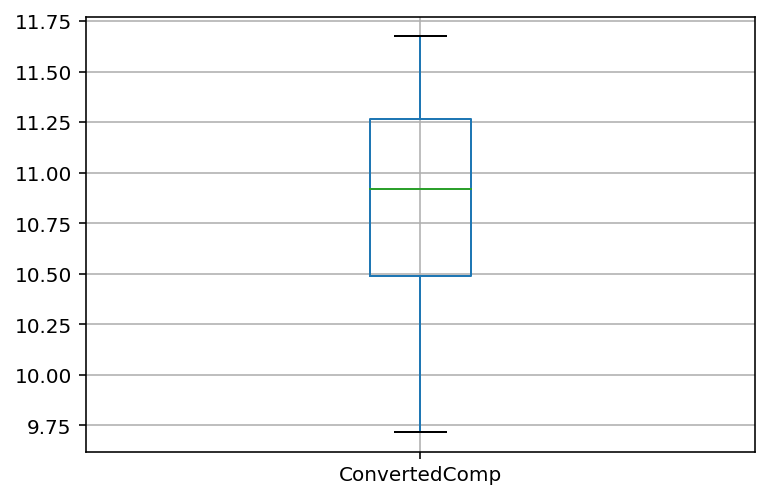

In [235]:
df_final.boxplot(column=['ConvertedComp'])

In [236]:
q_low, q_hi

(9.718000992399016, 11.674542487872497)

### Dropping all null values

In [237]:
df_final = df_final.dropna()

### Dropping redundant or unnecessary columns

In [238]:
df_final.drop(columns=['Respondent', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith' ,
                       'LanguageDesireNextYear', 'LanguageWorkedWith','PlatformDesireNextYear',
                      'PlatformWorkedWith'], inplace=True)

In [239]:
df_final = df_final.reset_index(drop=True)

In [240]:
df_final.head()

,Hobbyist,Age,ConvertedComp,Country,DevType,EdLevel,Employment,Ethnicity,Gender,OrgSize,UndergradMajor,YearsCodePro,Year
0,Yes,36,11.661354,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,20 to 99 employees,"Computer science, computer engineering, or sof...",13,2020
1,Yes,22,10.383318,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,2 to 9 employees,Mathematics or statistics,4,2020
2,Yes,23,10.598408,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"10,000 or more employees","Computer science, computer engineering, or sof...",2,2020
3,Yes,27,11.097425,United States,"Developer, desktop or enterprise applications;...","Associate degree (A.A., A.S., etc.)",Employed full-time,White or of European descent,Man,100 to 499 employees,"Computer science, computer engineering, or sof...",1,2020
4,No,24,11.331416,United States,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"10,000 or more employees","Computer science, computer engineering, or sof...",3,2020


In [241]:
df_final.shape

(45002, 13)

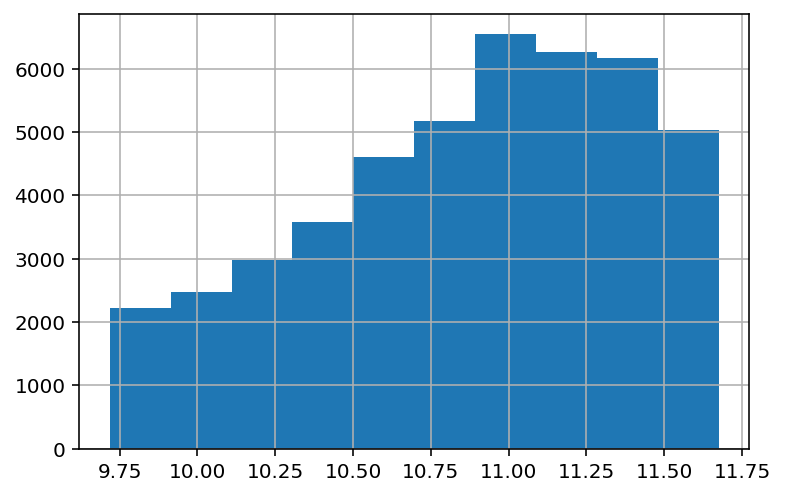

In [242]:
df_final.ConvertedComp.hist()

In [243]:
df_final.Age.value_counts()

25 - 34 years old    8070
35 - 44 years old    2692
30.0                 2148
28.0                 2124
29.0                 2056
                     ... 
96.0                    1
74.0                    1
73.0                    1
71.0                    1
2.0                     1
Name: Age, Length: 83, dtype: int64

In [244]:
df_final.YearsCodePro.value_counts()

3-5 years             4045
3                     3339
5                     3078
4                     2728
2                     2718
                      ... 
50                       3
46                       2
More than 50 years       2
45                       2
48                       1
Name: YearsCodePro, Length: 61, dtype: int64

#### Tranfsorming Age and YearsCodePro columns to categorical values for consistency

In [245]:
for i in range(len(df_final)):
    try:
        if int(df_final['Age'][i]) >= 18 and int(df_final['Age'][i]) <= 24:
            df_final['Age'][i] = '18 - 24 years old'
        elif int(df_final['Age'][i]) >= 25 and int(df_final['Age'][i]) <= 34:
            df_final['Age'][i] = '25 - 34 years old'
        elif int(df_final['Age'][i]) >= 35 and int(df_final['Age'][i]) <= 44:
            df_final['Age'][i] = '35 - 44 years old'
        elif int(df_final['Age'][i]) >= 45 and int(df_final['Age'][i])<= 54:
            df_final['Age'][i] = '45 - 54 years old'
        elif int(df_final['Age'][i]) >= 55 and int(df_final['Age'][i]) <= 64:
            df_final['Age'][i] = '55 - 64 years old'
        elif int(df_final['Age'][i]) < 18: 
            df_final['Age'][i] = 'Under 18 years old'
        elif int(df_final['Age'][i]) >= 65:
            df_final['Age'][i] = '65 years or older'
    finally:
        continue

In [246]:
for i in range(len(df_final)):
    try:
        if df_final['YearsCodePro'][i] == 'less than 1 year':
            df_final['YearsCodePro'][i] = '0-2 years'
        elif int(df_final['YearsCodePro'][i]) >= 0 and int(df_final['YearsCodePro'][i]) <= 2:
            df_final['YearsCodePro'][i] = '0-2 years'
        elif int(df_final['YearsCodePro'][i]) >= 3 and int(df_final['YearsCodePro'][i]) <= 5:
            df_final['YearsCodePro'][i] = '3-5 years'
        elif int(df_final['YearsCodePro'][i]) >= 6 and int(df_final['YearsCodePro'][i]) <= 8:
            df_final['YearsCodePro'][i] = '6-8 years'
        elif int(df_final['YearsCodePro'][i]) >= 9 and int(df_final['YearsCodePro'][i])<= 11:
            df_final['YearsCodePro'][i] = '9-11 years'
        elif int(df_final['YearsCodePro'][i]) >= 12 and int(df_final['YearsCodePro'][i]) <= 14:
            df_final['YearsCodePro'][i] = '12-14 years'
        elif int(df_final['YearsCodePro'][i]) >= 15 and int(df_final['YearsCodePro'][i]) <= 17:
            df_final['YearsCodePro'][i] = '15-17 years'
        elif int(df_final['YearsCodePro'][i]) >= 18 and int(df_final['YearsCodePro'][i]) <= 20:
            df_final['YearsCodePro'][i] = '18-20 years'
        elif int(df_final['YearsCodePro'][i]) >= 21 and int(df_final['YearsCodePro'][i]) <= 23:
            df_final['YearsCodePro'][i] = '21-23 years'
        elif int(df_final['YearsCodePro'][i]) >= 24 and int(df_final['YearsCodePro'][i]) <= 26:
            df_final['YearsCodePro'][i] = '24-26 years'
        elif int(df_final['YearsCodePro'][i]) >= 27 and int(df_final['YearsCodePro'][i]) <= 29:
            df_final['YearsCodePro'][i] = '27-29 years'
        else:
            df_final['YearsCodePro'][i] = '30 or more years'
    finally:
        continue

In [247]:
df_final.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                     3738
Developer, back-end                                                                                                                                                                                                                       2214
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                            1422
Developer, back-end;Developer, full-stack                                                                                                                                                                                                 1174
Full-stack developer                        

#### Creating columns based on unique developer types 

In [248]:
unique_DevType = []

# get all values in DevType column
for i in range(len(df_final)):
    temp = df_final['DevType'][i].split(';')
    for val in temp:
        unique_DevType.append(val)
        
# Get unique values only to be used for column names
unique_DevType = list(set(unique_DevType))
for dev in unique_DevType:
    df_final[dev] = 0
    
# Set values for each respondent
for i in range(len(df_final)):
    for dev in unique_DevType:
        if dev in df_final['DevType'][i]:
            df_final[dev][i] = 1
            
# remove initial DevType column       
df_final.drop(columns=['DevType'], inplace = True)

In [249]:
# Get names of categorical columns

cat_df = df_final.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

In [250]:
cat_cols_lst

Index(['Hobbyist', 'Age', 'Country', 'EdLevel', 'Employment', 'Ethnicity',
       'Gender', 'OrgSize', 'UndergradMajor', 'YearsCodePro', 'Year'],
      dtype='object')

In [251]:
# Udacity's create dummy df function
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

### Final dataframe after creating dummy columns

In [252]:
df_final_cat = create_dummy_df(df_final, cat_cols_lst, dummy_na=False) #Use your newly created function

In [253]:
list(df_final_cat.columns)

['ConvertedComp',
 'Mobile developer',
 'Educator or academic researcher',
 'QA or test developer',
 'Developer, QA or test',
 'C-suite executive (CEO, CTO, etc.)',
 'Engineering manager',
 'DevOps specialist',
 'Developer, full-stack',
 'Back-end developer',
 'Developer, back-end',
 'Student',
 'Marketing or sales professional',
 'Scientist',
 'Full-stack developer',
 'Engineer, data',
 'Senior executive/VP',
 'Developer, front-end',
 'Academic researcher',
 'Engineer, site reliability',
 'System administrator',
 'Product manager',
 'Educator',
 'Desktop or enterprise applications developer',
 'Front-end developer',
 'Developer, desktop or enterprise applications',
 'Database administrator',
 'Data or business analyst',
 'Developer, embedded applications or devices',
 'Embedded applications or devices developer',
 'Developer, mobile',
 'Data scientist or machine learning specialist',
 'Designer',
 'Developer, game or graphics',
 'Game or graphics developer',
 'Hobbyist_Yes',
 'Age_25 

In [254]:
df_final_cat.head()

,ConvertedComp,Mobile developer,Educator or academic researcher,QA or test developer,"Developer, QA or test","C-suite executive (CEO, CTO, etc.)",Engineering manager,DevOps specialist,"Developer, full-stack",Back-end developer,...,YearsCodePro_24-26 years,YearsCodePro_27-29 years,YearsCodePro_3-5 years,YearsCodePro_30 or more years,YearsCodePro_6-8 years,YearsCodePro_9-11 years,YearsCodePro_Less than 1 year,YearsCodePro_More than 50 years,Year_2019,Year_2020
0,11.661354,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10.383318,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,10.598408,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11.097425,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11.331416,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### Split data into label and features

In [255]:
label = df_final_cat['ConvertedComp']
# label = 1+ np.log(label)
Features = df_final_cat.drop(columns=['ConvertedComp'])

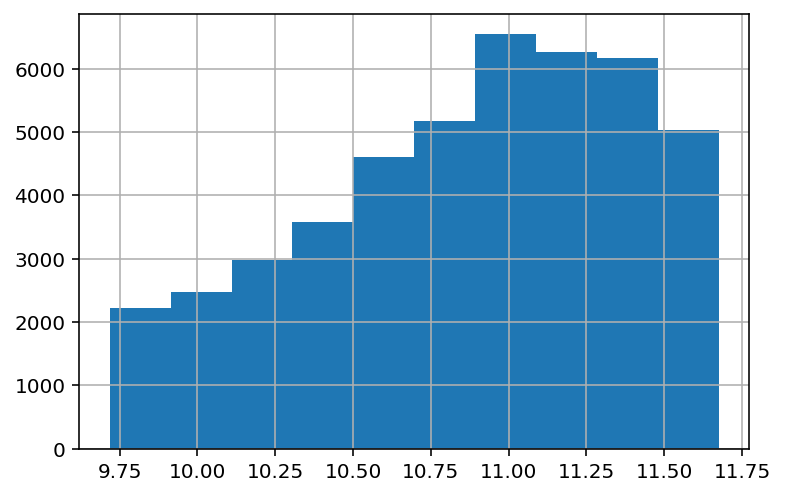

In [256]:
label.hist()

In [257]:
X_train, X_test, y_train, y_test = train_test_split(Features, label, random_state = 42, test_size=0.3, shuffle = True)

#### RANDOM FOREST

In [258]:
regr = RandomForestRegressor( n_estimators=200,max_depth=16, random_state=0)

In [259]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=200, random_state=0)

In [670]:
# regr.feature_importances_

In [260]:
len(regr.feature_importances_)

438

In [261]:
len(Features.columns)

438

#### Create Feature Importance dataframe

In [262]:
imp_feat = pd.DataFrame(data=Features.columns,columns=['features'])

# imp_feat.head()

imp_feat['imp'] = regr.feature_importances_.transpose()
# imp_feat['imp'] = imp_feat['imp'].values/max()

# imp_feat['imp'] = clf_lasso.coef_.transpose()

imp_feat.sort_values(by=['imp']).tail(20)

,features,imp
433,YearsCodePro_9-11 years,0.008670
430,YearsCodePro_3-5 years,0.009729
38,Age_55 - 64 years old,0.010171
95,Country_India,0.011159
137,Country_Norway,0.011653
132,Country_Netherlands,0.014203
75,Country_Denmark,0.016100
168,Country_Switzerland,0.016999
102,Country_Israel,0.019922
37,Age_45 - 54 years old,0.021963


In [263]:
y_pred_train = regr.predict(X_train)

In [264]:
y_pred_test = regr.predict(X_test)

In [265]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [266]:
rmse_train

0.30336325077263987

In [267]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [268]:
rmse_test

0.3516256812891169

In [269]:
r2_score(y_test, y_pred_test)

0.5298155146596679

#### RF  After feature selection

In [270]:
fs = SelectFromModel(RandomForestRegressor(n_estimators=200,max_depth=16, random_state=0),threshold = 'median')

In [271]:
fs.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(max_depth=16, n_estimators=200,
                                                random_state=0),
                threshold='median')

In [272]:
X_train_fs = fs.transform(X_train)

In [273]:
X_test_fs = fs.transform(X_test)

In [274]:
regr.fit(X_train_fs, y_train)

RandomForestRegressor(max_depth=16, n_estimators=200, random_state=0)

In [275]:
y_pred_fs = regr.predict(X_test_fs)

In [276]:
rmse_fs = np.sqrt(mean_squared_error(y_test, y_pred_fs))
rmse_fs

0.3515548228265717

In [277]:
r2_score(y_test, y_pred_fs)

0.530004995659465